In [1]:
import numpy as np
import numpy.matlib as mt

from ephysvibe.structures.neuron_data import NeuronData
from ephysvibe.trials import align_trials
from ephysvibe.task import task_constants

import os 
from matplotlib import cm
from matplotlib import pyplot as plt
import glob
import pickle

seed = 2023

In [2]:
with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/decoding_perf/decoding_perf_lipC0.8_nm1', 'rb') as handle:
    perf_lip = pickle.load(handle)

with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/decoding_perf/decoding_perf_pfcC0.8_nm1', 'rb') as handle:
    perf_pfc = pickle.load(handle)
    
with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/decoding_perf/decoding_perf_v4C0.8_nm1', 'rb') as handle:
    perf_v4 = pickle.load(handle)

In [3]:
def define_contour_latencies(data, thresh):
        
    X,Y = np.where(data>=thresh)
    A=np.zeros(data.shape)
    A[X,Y]=1
    Ya,Xa    =   np.where(np.abs(np.diff(A, axis=0))!=0)
    Yb,Xb    =   np.where(np.abs(np.diff(A, axis=1))!=0)
    Yy  =   np.concatenate([Ya, Yb])
    Xx  =   np.concatenate([Xa, Xb])
    return Xx,Yy

In [4]:
perf_lips_sample  =   perf_lip['perf sample']['sample']
perf_lips_orient  =   perf_lip['perf sample']['orientation']
perf_lips_color   =   perf_lip['perf sample']['color']
perf_lips_neutral =   perf_lip['perf sample']['neutral']

perf_pfcs_sample  =   perf_pfc['perf sample']['sample']
perf_pfcs_orient  =   perf_pfc['perf sample']['orientation']
perf_pfcs_color   =   perf_pfc['perf sample']['color']
perf_pfcs_neutral =   perf_pfc['perf sample']['neutral']

perf_v4s_sample  =   perf_v4['perf sample']['sample']
perf_v4s_orient  =   perf_v4['perf sample']['orientation']
perf_v4s_color   =   perf_v4['perf sample']['color']
perf_v4s_neutral =   perf_v4['perf sample']['neutral']


In [5]:
perf_lips_sample  =   perf_lip['perf sample']['sample nm1']
perf_lips_orient  =   perf_lip['perf sample']['orientation nm1']
perf_lips_color   =   perf_lip['perf sample']['color nm1']
perf_lips_neutral =   perf_lip['perf sample']['neutral nm1']

perf_pfcs_sample  =   perf_pfc['perf sample']['sample nm1']
perf_pfcs_orient  =   perf_pfc['perf sample']['orientation nm1']
perf_pfcs_color   =   perf_pfc['perf sample']['color nm1']
perf_pfcs_neutral =   perf_pfc['perf sample']['neutral nm1']

perf_v4s_sample  =   perf_v4['perf sample']['sample nm1']
perf_v4s_orient  =   perf_v4['perf sample']['orientation nm1']
perf_v4s_color   =   perf_v4['perf sample']['color nm1']
perf_v4s_neutral =   perf_v4['perf sample']['neutral nm1']


In [6]:
sig_lips_sample  =   np.empty([perf_lips_sample.shape[1], perf_lips_sample.shape[2]])
sig_lips_color   =   np.empty([perf_lips_color.shape[1],perf_lips_color.shape[2]])
sig_lips_orient  =   np.empty([perf_lips_orient.shape[1],perf_lips_orient.shape[2]])
sig_lips_neutral =   np.empty([perf_lips_neutral.shape[1],perf_lips_neutral.shape[1]])

sig_v4s_sample  =   np.empty([perf_v4s_sample.shape[1], perf_v4s_sample.shape[2]])
sig_v4s_color   =   np.empty([perf_v4s_color.shape[1],perf_v4s_color.shape[2]])
sig_v4s_orient  =   np.empty([perf_v4s_orient.shape[1],perf_v4s_orient.shape[2]])
sig_v4s_neutral =   np.empty([perf_v4s_neutral.shape[1],perf_v4s_neutral.shape[1]])

sig_pfcs_sample  =   np.empty([perf_pfcs_sample.shape[1], perf_pfcs_sample.shape[2]])
sig_pfcs_color   =   np.empty([perf_pfcs_color.shape[1],perf_pfcs_color.shape[2]])
sig_pfcs_orient  =   np.empty([perf_pfcs_orient.shape[1],perf_pfcs_orient.shape[2]])
sig_pfcs_neutral =   np.empty([perf_pfcs_neutral.shape[1],perf_pfcs_neutral.shape[1]])


for t in range(perf_lips_sample.shape[1]):
    for l in range(perf_lips_sample.shape[2]):
        sig_lips_sample[t,l]   =   np.where(perf_lips_sample[:,t,l]>10)[0].shape[0]
        sig_lips_color[t,l]    =   np.where(perf_lips_color[:,t,l]>10)[0].shape[0]
        sig_lips_orient[t,l]   =   np.where(perf_lips_orient[:,t,l]>10)[0].shape[0]
        sig_lips_neutral[t,l]  =   np.where(perf_lips_neutral[:,t,l]>10)[0].shape[0]
        
        sig_v4s_sample[t,l]   =   np.where(perf_v4s_sample[:,t,l]>10)[0].shape[0]
        sig_v4s_color[t,l]    =   np.where(perf_v4s_color[:,t,l]>10)[0].shape[0]
        sig_v4s_orient[t,l]   =   np.where(perf_v4s_orient[:,t,l]>10)[0].shape[0]
        sig_v4s_neutral[t,l]  =   np.where(perf_v4s_neutral[:,t,l]>10)[0].shape[0]
        
        sig_pfcs_sample[t,l]   =   np.where(perf_pfcs_sample[:,t,l]>10)[0].shape[0]
        sig_pfcs_color[t,l]    =   np.where(perf_pfcs_color[:,t,l]>10)[0].shape[0]
        sig_pfcs_orient[t,l]   =   np.where(perf_pfcs_orient[:,t,l]>10)[0].shape[0]
        sig_pfcs_neutral[t,l]  =   np.where(perf_pfcs_neutral[:,t,l]>10)[0].shape[0]

In [7]:


time_s=np.arange(start=-150, stop=450*3-50, step=10)
time_t=np.arange(start=-400, stop=450*2-50, step=10)
xt_s=[np.where(time_s==0)[0][0], np.where(time_s==450)[0][0]]#, np.where(time_s==900)[0][0]]
xt_t=[np.where(time_t==0)[0][0], np.where(time_t==450)[0][0]]


samp_limit  =   np.where(time_s==950)[0][0]
test_limit  =   np.where(time_t==500)[0][0]

In [8]:
thresh  =   950
cont_x_lip_sample,  cont_y_lip_sample  =   define_contour_latencies(sig_lips_sample, thresh)
cont_x_pfc_sample,  cont_y_pfc_sample  =   define_contour_latencies(sig_pfcs_sample, thresh)
cont_x_v4_sample,  cont_y_v4_sample    =   define_contour_latencies(sig_v4s_sample, thresh)

cont_x_lip_neutral,  cont_y_lip_neutral  =   define_contour_latencies(sig_lips_neutral, thresh)
cont_x_pfc_neutral,  cont_y_pfc_neutral  =   define_contour_latencies(sig_pfcs_neutral, thresh)
cont_x_v4_neutral,  cont_y_v4_neutral    =   define_contour_latencies(sig_v4s_neutral, thresh)

cont_x_lip_orient,  cont_y_lip_orient  =   define_contour_latencies(sig_lips_orient, thresh)
cont_x_pfc_orient,  cont_y_pfc_orient  =   define_contour_latencies(sig_pfcs_orient, thresh)
cont_x_v4_orient,  cont_y_v4_orient    =   define_contour_latencies(sig_v4s_orient, thresh)

cont_x_lip_color,  cont_y_lip_color =   define_contour_latencies(sig_lips_color, thresh)
cont_x_pfc_color,  cont_y_pfc_color =   define_contour_latencies(sig_pfcs_color, thresh)
cont_x_v4_color,  cont_y_v4_color   =   define_contour_latencies(sig_v4s_color, thresh)

# cont_x_pfc_sample,  cont_y_pfc_sample  =   define_contour_latencies(sig_pfcs_sample, thresh)
# cont_x_v4_sample,  cont_y_v4_sample    =   define_contour_latencies(sig_v4s_sample, thresh)

# cont_x_lip_neutral,  cont_y_lip_neutral  =   define_contour_latencies(sig_lips_neutral, thresh)
# cont_x_pfc_neutral,  cont_y_pfc_neutral  =   define_contour_latencies(sig_pfcs_neutral, thresh)
# cont_x_v4_neutral,  cont_y_v4_neutral    =   define_contour_latencies(sig_v4s_neutral, thresh)

# cont_x_lip_orient,  cont_y_lip_orient  =   define_contour_latencies(sig_lips_orient, thresh)
# cont_x_pfc_orient,  cont_y_pfc_orient  =   define_contour_latencies(sig_pfcs_orient, thresh)
# cont_x_v4_orient,  cont_y_v4_orient    =   define_contour_latencies(sig_v4s_orient, thresh)

# cont_x_lip_color,  cont_y_lip_color  =   define_contour_latencies(sig_lips_color, thresh)
# cont_x_pfc_color,  cont_y_pfc_color  =   define_contour_latencies(sig_pfcs_color, thresh)
# cont_x_v4_color,  cont_y_v4_color    =   define_contour_latencies(sig_v4s_color, thresh)

In [ ]:
sig_lips_sample

In [9]:

cont_x_lip_00_sample,  cont_y_00_lip_sample  =   define_contour_latencies(sig_lips_sample[len(time_s):,:len(time_s)], thresh)
cont_x_lip_10_sample,  cont_y_10_lip_sample  =   define_contour_latencies(sig_lips_sample[:len(time_s),:len(time_s)], thresh)
cont_x_lip_01_sample,  cont_y_01_lip_sample  =   define_contour_latencies(sig_lips_sample[len(time_s):,len(time_s):], thresh)
cont_x_lip_11_sample,  cont_y_11_lip_sample  =   define_contour_latencies(sig_lips_sample[:len(time_s),len(time_s):], thresh)



cont_x_pfc_00_sample,  cont_y_00_pfc_sample  =   define_contour_latencies(sig_pfcs_sample[len(time_s):,:len(time_s)], thresh)
cont_x_pfc_10_sample,  cont_y_10_pfc_sample  =   define_contour_latencies(sig_pfcs_sample[:len(time_s),:len(time_s)], thresh)
cont_x_pfc_01_sample,  cont_y_01_pfc_sample  =   define_contour_latencies(sig_pfcs_sample[len(time_s):,len(time_s):], thresh)
cont_x_pfc_11_sample,  cont_y_11_pfc_sample  =   define_contour_latencies(sig_pfcs_sample[:len(time_s),len(time_s):], thresh)


cont_x_v4_00_sample,  cont_y_00_v4_sample  =   define_contour_latencies(sig_v4s_sample[len(time_s):,:len(time_s)], thresh)
cont_x_v4_10_sample,  cont_y_10_v4_sample  =   define_contour_latencies(sig_v4s_sample[:len(time_s),:len(time_s)], thresh)
cont_x_v4_01_sample,  cont_y_01_v4_sample  =   define_contour_latencies(sig_v4s_sample[len(time_s):,len(time_s):], thresh)
cont_x_v4_11_sample,  cont_y_11_v4_sample  =   define_contour_latencies(sig_v4s_sample[:len(time_s),len(time_s):], thresh)




cont_x_lip_00_neutral,  cont_y_00_lip_neutral  =   define_contour_latencies(sig_lips_neutral[len(time_s):,:len(time_s)], thresh)
cont_x_lip_10_neutral,  cont_y_10_lip_neutral  =   define_contour_latencies(sig_lips_neutral[:len(time_s),:len(time_s)], thresh)
cont_x_lip_01_neutral,  cont_y_01_lip_neutral  =   define_contour_latencies(sig_lips_neutral[len(time_s):,len(time_s):], thresh)
cont_x_lip_11_neutral,  cont_y_11_lip_neutral  =   define_contour_latencies(sig_lips_neutral[:len(time_s),len(time_s):], thresh)



cont_x_pfc_00_neutral,  cont_y_00_pfc_neutral  =   define_contour_latencies(sig_pfcs_neutral[len(time_s):,:len(time_s)], thresh)
cont_x_pfc_10_neutral,  cont_y_10_pfc_neutral  =   define_contour_latencies(sig_pfcs_neutral[:len(time_s),:len(time_s)], thresh)
cont_x_pfc_01_neutral,  cont_y_01_pfc_neutral  =   define_contour_latencies(sig_pfcs_neutral[len(time_s):,len(time_s):], thresh)
cont_x_pfc_11_neutral,  cont_y_11_pfc_neutral  =   define_contour_latencies(sig_pfcs_neutral[:len(time_s),len(time_s):], thresh)


cont_x_v4_00_neutral,  cont_y_00_v4_neutral  =   define_contour_latencies(sig_v4s_neutral[len(time_s):,:len(time_s)], thresh)
cont_x_v4_10_neutral,  cont_y_10_v4_neutral  =   define_contour_latencies(sig_v4s_neutral[:len(time_s),:len(time_s)], thresh)
cont_x_v4_01_neutral,  cont_y_01_v4_neutral  =   define_contour_latencies(sig_v4s_neutral[len(time_s):,len(time_s):], thresh)
cont_x_v4_11_neutral,  cont_y_11_v4_neutral  =   define_contour_latencies(sig_v4s_neutral[:len(time_s),len(time_s):], thresh)


cont_x_lip_00_orient,  cont_y_00_lip_orient  =   define_contour_latencies(sig_lips_orient[len(time_s):,:len(time_s)], thresh)
cont_x_lip_10_orient,  cont_y_10_lip_orient  =   define_contour_latencies(sig_lips_orient[:len(time_s),:len(time_s)], thresh)
cont_x_lip_01_orient,  cont_y_01_lip_orient  =   define_contour_latencies(sig_lips_orient[len(time_s):,len(time_s):], thresh)
cont_x_lip_11_orient,  cont_y_11_lip_orient  =   define_contour_latencies(sig_lips_orient[:len(time_s),len(time_s):], thresh)



cont_x_pfc_00_orient,  cont_y_00_pfc_orient  =   define_contour_latencies(sig_pfcs_orient[len(time_s):,:len(time_s)], thresh)
cont_x_pfc_10_orient,  cont_y_10_pfc_orient  =   define_contour_latencies(sig_pfcs_orient[:len(time_s),:len(time_s)], thresh)
cont_x_pfc_01_orient,  cont_y_01_pfc_orient  =   define_contour_latencies(sig_pfcs_orient[len(time_s):,len(time_s):], thresh)
cont_x_pfc_11_orient,  cont_y_11_pfc_orient  =   define_contour_latencies(sig_pfcs_orient[:len(time_s),len(time_s):], thresh)


cont_x_v4_00_orient,  cont_y_00_v4_orient  =   define_contour_latencies(sig_v4s_orient[len(time_s):,:len(time_s)], thresh)
cont_x_v4_10_orient,  cont_y_10_v4_orient  =   define_contour_latencies(sig_v4s_orient[:len(time_s),:len(time_s)], thresh)
cont_x_v4_01_orient,  cont_y_01_v4_orient  =   define_contour_latencies(sig_v4s_orient[len(time_s):,len(time_s):], thresh)
cont_x_v4_11_orient,  cont_y_11_v4_orient  =   define_contour_latencies(sig_v4s_orient[:len(time_s),len(time_s):], thresh)

cont_x_lip_00_color,  cont_y_00_lip_color  =   define_contour_latencies(sig_lips_color[len(time_s):,:len(time_s)], thresh)
cont_x_lip_10_color,  cont_y_10_lip_color  =   define_contour_latencies(sig_lips_color[:len(time_s),:len(time_s)], thresh)
cont_x_lip_01_color,  cont_y_01_lip_color  =   define_contour_latencies(sig_lips_color[len(time_s):,len(time_s):], thresh)
cont_x_lip_11_color,  cont_y_11_lip_color  =   define_contour_latencies(sig_lips_color[:len(time_s),len(time_s):], thresh)



cont_x_pfc_00_color,  cont_y_00_pfc_color  =   define_contour_latencies(sig_pfcs_color[len(time_s):,:len(time_s)], thresh)
cont_x_pfc_10_color,  cont_y_10_pfc_color  =   define_contour_latencies(sig_pfcs_color[:len(time_s),:len(time_s)], thresh)
cont_x_pfc_01_color,  cont_y_01_pfc_color  =   define_contour_latencies(sig_pfcs_color[len(time_s):,len(time_s):], thresh)
cont_x_pfc_11_color,  cont_y_11_pfc_color  =   define_contour_latencies(sig_pfcs_color[:len(time_s),len(time_s):], thresh)


cont_x_v4_00_color,  cont_y_00_v4_color  =   define_contour_latencies(sig_v4s_color[len(time_s):,:len(time_s)], thresh)
cont_x_v4_10_color,  cont_y_10_v4_color  =   define_contour_latencies(sig_v4s_color[:len(time_s),:len(time_s)], thresh)
cont_x_v4_01_color,  cont_y_01_v4_color  =   define_contour_latencies(sig_v4s_color[len(time_s):,len(time_s):], thresh)
cont_x_v4_11_color,  cont_y_11_v4_color  =   define_contour_latencies(sig_v4s_color[:len(time_s),len(time_s):], thresh)

In [10]:
data=sig_pfcs_neutral[:len(time_s),:len(time_s)]
thresh=950
X,Y = np.where(data>=thresh)
A=np.zeros(data.shape)
A[X,Y]=1
Xx,Yy    =   np.where(np.abs(np.diff(A))!=0)

In [10]:
## split data based on training and testing epoch
# Neutral
perf_lip_tr_s_t_s_neutral   =   perf_lips_neutral[:,:len(time_s),:len(time_s)]
perf_lip_tr_s_t_t_neutral   =   perf_lips_neutral[:,:len(time_s),len(time_s):]
perf_lip_tr_t_t_s_neutral   =   perf_lips_neutral[:,len(time_s):,:len(time_s)]
perf_lip_tr_t_t_t_neutral   =   perf_lips_neutral[:,len(time_s):,len(time_s):]

perf_pfc_tr_s_t_s_neutral   =   perf_pfcs_neutral[:,:len(time_s),:len(time_s)]
perf_pfc_tr_s_t_t_neutral   =   perf_pfcs_neutral[:,:len(time_s),len(time_s):]
perf_pfc_tr_t_t_s_neutral   =   perf_pfcs_neutral[:,len(time_s):,:len(time_s)]
perf_pfc_tr_t_t_t_neutral   =   perf_pfcs_neutral[:,len(time_s):,len(time_s):]

perf_v4_tr_s_t_s_neutral    =   perf_v4s_neutral[:,:len(time_s),:len(time_s)]
perf_v4_tr_s_t_t_neutral    =   perf_v4s_neutral[:,:len(time_s),len(time_s):]
perf_v4_tr_t_t_s_neutral    =   perf_v4s_neutral[:,len(time_s):,:len(time_s)]
perf_v4_tr_t_t_t_neutral    =   perf_v4s_neutral[:,len(time_s):,len(time_s):]


# Sample
perf_lip_tr_s_t_s_sample    =   perf_lips_sample[:,:len(time_s),:len(time_s)]
perf_lip_tr_s_t_t_sample    =   perf_lips_sample[:,:len(time_s),len(time_s):]
perf_lip_tr_t_t_s_sample    =   perf_lips_sample[:,len(time_s):,:len(time_s)]
perf_lip_tr_t_t_t_sample    =   perf_lips_sample[:,len(time_s):,len(time_s):]

perf_pfc_tr_s_t_s_sample    =   perf_pfcs_sample[:,:len(time_s),:len(time_s)]
perf_pfc_tr_s_t_t_sample    =   perf_pfcs_sample[:,:len(time_s),len(time_s):]
perf_pfc_tr_t_t_s_sample    =   perf_pfcs_sample[:,len(time_s):,:len(time_s)]
perf_pfc_tr_t_t_t_sample    =   perf_pfcs_sample[:,len(time_s):,len(time_s):]

perf_v4_tr_s_t_s_sample     =   perf_v4s_sample[:,:len(time_s),:len(time_s)]
perf_v4_tr_s_t_t_sample     =   perf_v4s_sample[:,:len(time_s),len(time_s):]
perf_v4_tr_t_t_s_sample     =   perf_v4s_sample[:,len(time_s):,:len(time_s)]
perf_v4_tr_t_t_t_sample     =   perf_v4s_sample[:,len(time_s):,len(time_s):]

perf_lip_tr_s_t_s_sample    =   perf_lips_sample[:,:len(time_s),:len(time_s)]
perf_lip_tr_s_t_t_sample    =   perf_lips_sample[:,:len(time_s),len(time_s):]
perf_lip_tr_t_t_s_sample    =   perf_lips_sample[:,len(time_s):,:len(time_s)]
perf_lip_tr_t_t_t_sample    =   perf_lips_sample[:,len(time_s):,len(time_s):]

perf_pfc_tr_s_t_s_sample    =   perf_pfcs_sample[:,:len(time_s),:len(time_s)]
perf_pfc_tr_s_t_t_sample    =   perf_pfcs_sample[:,:len(time_s),len(time_s):]
perf_pfc_tr_t_t_s_sample    =   perf_pfcs_sample[:,len(time_s):,:len(time_s)]
perf_pfc_tr_t_t_t_sample    =   perf_pfcs_sample[:,len(time_s):,len(time_s):]

perf_v4_tr_s_t_s_sample     =   perf_v4s_sample[:,:len(time_s),:len(time_s)]
perf_v4_tr_s_t_t_sample     =   perf_v4s_sample[:,:len(time_s),len(time_s):]
perf_v4_tr_t_t_s_sample     =   perf_v4s_sample[:,len(time_s):,:len(time_s)]
perf_v4_tr_t_t_t_sample     =   perf_v4s_sample[:,len(time_s):,len(time_s):]

# Orientation
perf_lip_tr_s_t_s_orient    =   perf_lips_orient[:,:len(time_s),:len(time_s)]
perf_lip_tr_s_t_t_orient    =   perf_lips_orient[:,:len(time_s),len(time_s):]
perf_lip_tr_t_t_s_orient    =   perf_lips_orient[:,len(time_s):,:len(time_s)]
perf_lip_tr_t_t_t_orient    =   perf_lips_orient[:,len(time_s):,len(time_s):]

perf_pfc_tr_s_t_s_orient    =   perf_pfcs_orient[:,:len(time_s),:len(time_s)]
perf_pfc_tr_s_t_t_orient    =   perf_pfcs_orient[:,:len(time_s),len(time_s):]
perf_pfc_tr_t_t_s_orient    =   perf_pfcs_orient[:,len(time_s):,:len(time_s)]
perf_pfc_tr_t_t_t_orient    =   perf_pfcs_orient[:,len(time_s):,len(time_s):]

perf_v4_tr_s_t_s_orient     =   perf_v4s_orient[:,:len(time_s),:len(time_s)]
perf_v4_tr_s_t_t_orient     =   perf_v4s_orient[:,:len(time_s),len(time_s):]
perf_v4_tr_t_t_s_orient     =   perf_v4s_orient[:,len(time_s):,:len(time_s)]
perf_v4_tr_t_t_t_orient     =   perf_v4s_orient[:,len(time_s):,len(time_s):]

# Color
perf_lip_tr_s_t_s_color     =   perf_lips_color[:,:len(time_s),:len(time_s)]
perf_lip_tr_s_t_t_color     =   perf_lips_color[:,:len(time_s),len(time_s):]
perf_lip_tr_t_t_s_color     =   perf_lips_color[:,len(time_s):,:len(time_s)]
perf_lip_tr_t_t_t_color     =   perf_lips_color[:,len(time_s):,len(time_s):]

perf_pfc_tr_s_t_s_color     =   perf_pfcs_color[:,:len(time_s),:len(time_s)]
perf_pfc_tr_s_t_t_color     =   perf_pfcs_color[:,:len(time_s),len(time_s):]
perf_pfc_tr_t_t_s_color     =   perf_pfcs_color[:,len(time_s):,:len(time_s)]
perf_pfc_tr_t_t_t_color     =   perf_pfcs_color[:,len(time_s):,len(time_s):]

perf_v4_tr_s_t_s_color      =   perf_v4s_color[:,:len(time_s),:len(time_s)]
perf_v4_tr_s_t_t_color      =   perf_v4s_color[:,:len(time_s),len(time_s):]
perf_v4_tr_t_t_s_color      =   perf_v4s_color[:,len(time_s):,:len(time_s)]
perf_v4_tr_t_t_t_color      =   perf_v4s_color[:,len(time_s):,len(time_s):]

X_grid_tr_s_t_s, Y_grid_tr_s_t_s    =   np.meshgrid(np.arange(len(time_s)), np.arange(len(time_s)))
X_grid_tr_t_t_s, Y_grid_tr_t_t_s    =   np.meshgrid(np.arange(len(time_s)), np.arange(len(time_t)))
X_grid_tr_s_t_t, Y_grid_tr_s_t_t    =   np.meshgrid(np.arange(len(time_t)), np.arange(len(time_s)))
X_grid_tr_t_t_t, Y_grid_tr_t_t_t    =   np.meshgrid(np.arange(len(time_t)), np.arange(len(time_t)))



In [11]:
## split data based on training and testing epoch
# Neutral
sig_lip_tr_s_t_s_neutral    =   sig_lips_neutral[:len(time_s),:len(time_s)]
sig_lip_tr_s_t_t_neutral    =   sig_lips_neutral[:len(time_s),len(time_s):]
sig_lip_tr_t_t_s_neutral    =   sig_lips_neutral[len(time_s):,:len(time_s)]
sig_lip_tr_t_t_t_neutral    =   sig_lips_neutral[len(time_s):,len(time_s):]

sig_pfc_tr_s_t_s_neutral    =   sig_pfcs_neutral[:len(time_s),:len(time_s)]
sig_pfc_tr_s_t_t_neutral    =   sig_pfcs_neutral[:len(time_s),len(time_s):]
sig_pfc_tr_t_t_s_neutral    =   sig_pfcs_neutral[len(time_s):,:len(time_s)]
sig_pfc_tr_t_t_t_neutral    =   sig_pfcs_neutral[len(time_s):,len(time_s):]

sig_v4_tr_s_t_s_neutral     =   sig_v4s_neutral[:len(time_s),:len(time_s)]
sig_v4_tr_s_t_t_neutral     =   sig_v4s_neutral[:len(time_s),len(time_s):]
sig_v4_tr_t_t_s_neutral     =   sig_v4s_neutral[len(time_s):,:len(time_s)]
sig_v4_tr_t_t_t_neutral     =   sig_v4s_neutral[len(time_s):,len(time_s):]


# Sample
sig_lip_tr_s_t_s_sample     =   sig_lips_sample[:len(time_s),:len(time_s)]
sig_lip_tr_s_t_t_sample     =   sig_lips_sample[:len(time_s),len(time_s):]
sig_lip_tr_t_t_s_sample     =   sig_lips_sample[len(time_s):,:len(time_s)]
sig_lip_tr_t_t_t_sample     =   sig_lips_sample[len(time_s):,len(time_s):]

sig_pfc_tr_s_t_s_sample     =   sig_pfcs_sample[:len(time_s),:len(time_s)]
sig_pfc_tr_s_t_t_sample     =   sig_pfcs_sample[:len(time_s),len(time_s):]
sig_pfc_tr_t_t_s_sample     =   sig_pfcs_sample[len(time_s):,:len(time_s)]
sig_pfc_tr_t_t_t_sample     =   sig_pfcs_sample[len(time_s):,len(time_s):]

sig_v4_tr_s_t_s_sample      =   sig_v4s_sample[:len(time_s),:len(time_s)]
sig_v4_tr_s_t_t_sample      =   sig_v4s_sample[:len(time_s),len(time_s):]
sig_v4_tr_t_t_s_sample      =   sig_v4s_sample[len(time_s):,:len(time_s)]
sig_v4_tr_t_t_t_sample      =   sig_v4s_sample[len(time_s):,len(time_s):]

sig_lip_tr_s_t_s_sample     =   sig_lips_sample[:len(time_s),:len(time_s)]
sig_lip_tr_s_t_t_sample     =   sig_lips_sample[:len(time_s),len(time_s):]
sig_lip_tr_t_t_s_sample     =   sig_lips_sample[len(time_s):,:len(time_s)]
sig_lip_tr_t_t_t_sample     =   sig_lips_sample[len(time_s):,len(time_s):]

sig_pfc_tr_s_t_s_sample     =   sig_pfcs_sample[:len(time_s),:len(time_s)]
sig_pfc_tr_s_t_t_sample     =   sig_pfcs_sample[:len(time_s),len(time_s):]
sig_pfc_tr_t_t_s_sample     =   sig_pfcs_sample[len(time_s):,:len(time_s)]
sig_pfc_tr_t_t_t_sample     =   sig_pfcs_sample[len(time_s):,len(time_s):]

sig_v4_tr_s_t_s_sample      =   sig_v4s_sample[:len(time_s),:len(time_s)]
sig_v4_tr_s_t_t_sample      =   sig_v4s_sample[:len(time_s),len(time_s):]
sig_v4_tr_t_t_s_sample      =   sig_v4s_sample[len(time_s):,:len(time_s)]
sig_v4_tr_t_t_t_sample      =   sig_v4s_sample[len(time_s):,len(time_s):]

# Orientation
sig_lip_tr_s_t_s_orient     =   sig_lips_orient[:len(time_s),:len(time_s)]
sig_lip_tr_s_t_t_orient     =   sig_lips_orient[:len(time_s),len(time_s):]
sig_lip_tr_t_t_s_orient     =   sig_lips_orient[len(time_s):,:len(time_s)]
sig_lip_tr_t_t_t_orient     =   sig_lips_orient[len(time_s):,len(time_s):]

sig_pfc_tr_s_t_s_orient     =   sig_pfcs_orient[:len(time_s),:len(time_s)]
sig_pfc_tr_s_t_t_orient     =   sig_pfcs_orient[:len(time_s),len(time_s):]
sig_pfc_tr_t_t_s_orient     =   sig_pfcs_orient[len(time_s):,:len(time_s)]
sig_pfc_tr_t_t_t_orient     =   sig_pfcs_orient[len(time_s):,len(time_s):]

sig_v4_tr_s_t_s_orient      =   sig_v4s_orient[:len(time_s),:len(time_s)]
sig_v4_tr_s_t_t_orient      =   sig_v4s_orient[:len(time_s),len(time_s):]
sig_v4_tr_t_t_s_orient      =   sig_v4s_orient[len(time_s):,:len(time_s)]
sig_v4_tr_t_t_t_orient      =   sig_v4s_orient[len(time_s):,len(time_s):]

# Color
sig_lip_tr_s_t_s_color      =   sig_lips_color[:len(time_s),:len(time_s)]
sig_lip_tr_s_t_t_color      =   sig_lips_color[:len(time_s),len(time_s):]
sig_lip_tr_t_t_s_color      =   sig_lips_color[len(time_s):,:len(time_s)]
sig_lip_tr_t_t_t_color      =   sig_lips_color[len(time_s):,len(time_s):]

sig_pfc_tr_s_t_s_color      =   sig_pfcs_color[:len(time_s),:len(time_s)]
sig_pfc_tr_s_t_t_color      =   sig_pfcs_color[:len(time_s),len(time_s):]
sig_pfc_tr_t_t_s_color      =   sig_pfcs_color[len(time_s):,:len(time_s)]
sig_pfc_tr_t_t_t_color      =   sig_pfcs_color[len(time_s):,len(time_s):]

sig_v4_tr_s_t_s_color       =   sig_v4s_color[:len(time_s),:len(time_s)]
sig_v4_tr_s_t_t_color       =   sig_v4s_color[:len(time_s),len(time_s):]
sig_v4_tr_t_t_s_color       =   sig_v4s_color[len(time_s):,:len(time_s)]
sig_v4_tr_t_t_t_color       =   sig_v4s_color[len(time_s):,len(time_s):]

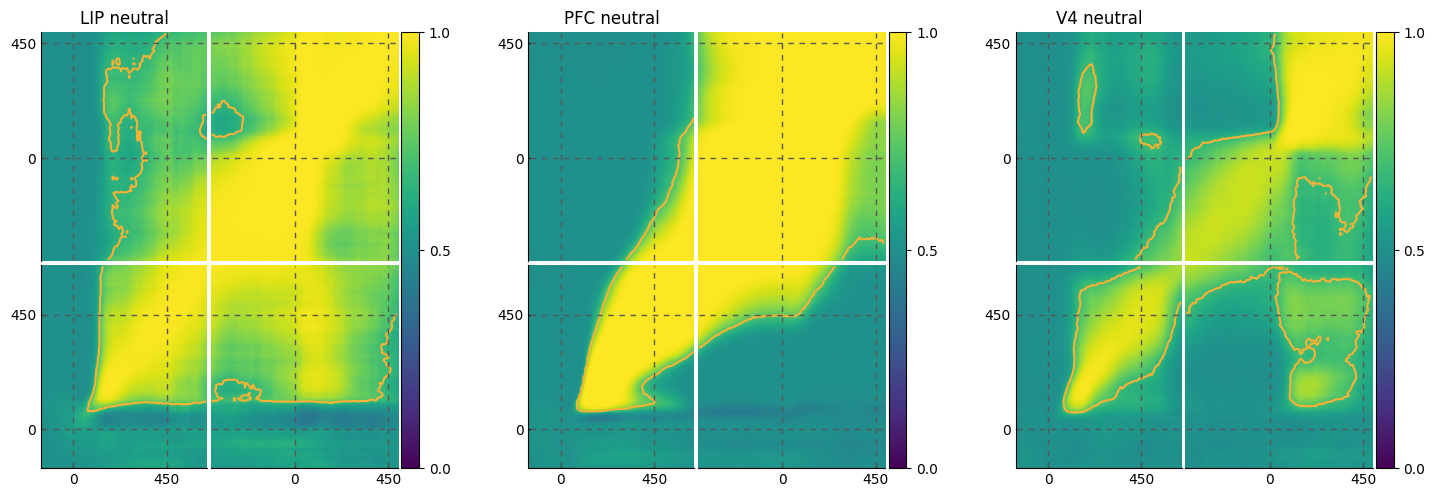

In [13]:

samp_limit  =   np.where(time_s==650)[0][0]
test_limit  =   np.where(time_t==500)[0][0]

xt_s=[np.where(time_s==0)[0][0], np.where(time_s==450)[0][0]]#, np.where(time_s==900)[0][0]]
xt_t=[np.where(time_t==0)[0][0], np.where(time_t==450)[0][0]]

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(18)

test_r=int(test_limit/10)
sample_r=int(samp_limit/10)

total_dim=(sample_r+test_r+1, (sample_r+test_r+5)*3)
panel_dim=sample_r+test_r+1+5
yloc=[0, panel_dim, panel_dim*2]

im00 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[0]), colspan=sample_r, rowspan=test_r)
im01 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[0]+sample_r), colspan=test_r, rowspan=test_r)
im10 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[0]), colspan=sample_r, rowspan=sample_r)
im11 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[0]+sample_r), colspan=test_r, rowspan=sample_r)
imcb0= plt.subplot2grid(shape=total_dim,  loc=(0, yloc[0]+sample_r+test_r), colspan=1, rowspan=sample_r+test_r)

im02 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[1]), colspan=sample_r, rowspan=test_r)
im03 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[1]+sample_r), colspan=test_r, rowspan=test_r)
im12 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[1]), colspan=sample_r, rowspan=sample_r)
im13 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[1]+sample_r), colspan=test_r, rowspan=sample_r)
imcb1= plt.subplot2grid(shape=total_dim,  loc=(0, yloc[1]+sample_r+test_r), colspan=1, rowspan=sample_r+test_r)

im04 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[2]), colspan=sample_r, rowspan=test_r)
im05 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[2]+sample_r), colspan=test_r, rowspan=test_r)
im14 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[2]), colspan=sample_r, rowspan=sample_r)
im15 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[2]+sample_r), colspan=test_r, rowspan=sample_r)
imcb2= plt.subplot2grid(shape=total_dim,  loc=(0, yloc[2]+sample_r+test_r), colspan=1, rowspan=sample_r+test_r)

i00=im00.imshow(np.mean(perf_lip_tr_t_t_s_neutral[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im10.imshow(np.mean(perf_lip_tr_s_t_s_neutral[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im01.imshow(np.mean(perf_lip_tr_t_t_t_neutral[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im11.imshow(np.mean(perf_lip_tr_s_t_t_neutral[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

im02.imshow(np.mean(perf_pfc_tr_t_t_s_neutral[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im03.imshow(np.mean(perf_pfc_tr_t_t_t_neutral[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im12.imshow(np.mean(perf_pfc_tr_s_t_s_neutral[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im13.imshow(np.mean(perf_pfc_tr_s_t_t_neutral[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

im04.imshow(np.mean(perf_v4_tr_t_t_s_neutral[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im05.imshow(np.mean(perf_v4_tr_t_t_t_neutral[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im14.imshow(np.mean(perf_v4_tr_s_t_s_neutral[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im15.imshow(np.mean(perf_v4_tr_s_t_t_neutral[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')



im00.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_lip_tr_t_t_s_neutral[:test_limit,:samp_limit], [thresh], colors='#F9B233')
im01.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_lip_tr_t_t_t_neutral[:test_limit,:test_limit], [thresh], colors='#F9B233')
im10.contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_lip_tr_s_t_s_neutral[:samp_limit,:samp_limit], [thresh], colors='#F9B233')
im11.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_lip_tr_s_t_t_neutral[:samp_limit,:test_limit], [thresh], colors='#F9B233')

im02.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_pfc_tr_t_t_s_neutral[:test_limit,:samp_limit], [thresh], colors='#F9B233')
im03.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_pfc_tr_t_t_t_neutral[:test_limit,:test_limit], [thresh], colors='#F9B233')
im12.contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_pfc_tr_s_t_s_neutral[:samp_limit,:samp_limit], [thresh], colors='#F9B233')
im13.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_pfc_tr_s_t_t_neutral[:samp_limit,:test_limit], [thresh], colors='#F9B233')

im04.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_v4_tr_t_t_s_neutral[:test_limit,:samp_limit], [thresh], colors='#F9B233')
im05.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_v4_tr_t_t_t_neutral[:test_limit,:test_limit], [thresh], colors='#F9B233')
im14.contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_v4_tr_s_t_s_neutral[:samp_limit,:samp_limit], [thresh], colors='#F9B233')
im15.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_v4_tr_s_t_t_neutral[:samp_limit,:test_limit], [thresh], colors='#F9B233')

im00.set_xticks([])
im00.set_yticks(xt_t)
im01.set_xticks([])
im01.set_yticks([])
im10.set_xticks(xt_s)
im10.set_yticks(xt_s)
im11.set_xticks(xt_t)
im11.set_yticks([])

im00.plot([xt_s[0], xt_s[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im00.plot([xt_s[1], xt_s[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([xt_s[0], xt_s[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([xt_s[1], xt_s[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im00.plot([0, samp_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im00.plot([0, samp_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([0, samp_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([0, samp_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im01.plot([xt_t[0], xt_t[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im01.plot([xt_t[1], xt_t[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([xt_t[0], xt_t[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([xt_t[1], xt_t[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im01.plot([0, test_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im01.plot([0, test_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([0, test_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([0, test_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im02.plot([xt_s[0], xt_s[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im02.plot([xt_s[1], xt_s[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([xt_s[0], xt_s[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([xt_s[1], xt_s[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im02.plot([0, samp_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im02.plot([0, samp_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([0, samp_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([0, samp_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im03.plot([xt_t[0], xt_t[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im03.plot([xt_t[1], xt_t[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([xt_t[0], xt_t[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([xt_t[1], xt_t[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im03.plot([0, test_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im03.plot([0, test_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([0, test_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([0, test_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im04.plot([xt_s[0], xt_s[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im04.plot([xt_s[1], xt_s[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([xt_s[0], xt_s[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([xt_s[1], xt_s[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im04.plot([0, samp_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im04.plot([0, samp_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([0, samp_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([0, samp_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im05.plot([xt_t[0], xt_t[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im05.plot([xt_t[1], xt_t[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([xt_t[0], xt_t[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([xt_t[1], xt_t[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im05.plot([0, test_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im05.plot([0, test_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([0, test_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([0, test_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im00.set_yticklabels(time_t[xt_t].astype(str))
im10.set_xticklabels(time_s[xt_s].astype(str))
im10.set_yticklabels(time_s[xt_s].astype(str))
im11.set_xticklabels(time_t[xt_t].astype(str))

im00.set_yticklabels(time_t[xt_t].astype(str))
im10.set_xticklabels(time_s[xt_s].astype(str))
im10.set_yticklabels(time_s[xt_s].astype(str))
im11.set_xticklabels(time_t[xt_t].astype(str))

im02.set_xticks([])
im02.set_yticks(xt_t)
im03.set_xticks([])
im03.set_yticks([])
im12.set_xticks(xt_s)
im12.set_yticks(xt_s)
im13.set_xticks(xt_t)
im13.set_yticks([])

im02.set_yticklabels(time_t[xt_t].astype(str))
im12.set_xticklabels(time_s[xt_s].astype(str))
im12.set_yticklabels(time_s[xt_s].astype(str))
im13.set_xticklabels(time_t[xt_t].astype(str))


im04.set_xticks([])
im04.set_yticks(xt_t)
im05.set_xticks([])
im05.set_yticks([])
im14.set_xticks(xt_s)
im14.set_yticks(xt_s)
im15.set_xticks(xt_t)
im15.set_yticks([])

im04.set_yticklabels(time_t[xt_t].astype(str))
im14.set_xticklabels(time_s[xt_s].astype(str))
im14.set_yticklabels(time_s[xt_s].astype(str))
im15.set_xticklabels(time_t[xt_t].astype(str))



im00.spines['top'].set_visible(False)
im00.spines['right'].set_visible(False)
im00.spines['bottom'].set_visible(False)

im01.spines['top'].set_visible(False)
im01.spines['right'].set_visible(False)
im01.spines['bottom'].set_visible(False)
im01.spines['left'].set_visible(False)

im10.spines['top'].set_visible(False)
im10.spines['right'].set_visible(False)

im11.spines['top'].set_visible(False)
im11.spines['right'].set_visible(False)
im11.spines['left'].set_visible(False)

im02.spines['top'].set_visible(False)
im02.spines['right'].set_visible(False)
im02.spines['bottom'].set_visible(False)

im03.spines['top'].set_visible(False)
im03.spines['right'].set_visible(False)
im03.spines['bottom'].set_visible(False)
im03.spines['left'].set_visible(False)

im12.spines['top'].set_visible(False)
im12.spines['right'].set_visible(False)

im13.spines['top'].set_visible(False)
im13.spines['right'].set_visible(False)
im13.spines['left'].set_visible(False)


im04.spines['top'].set_visible(False)
im04.spines['right'].set_visible(False)
im04.spines['bottom'].set_visible(False)

im05.spines['top'].set_visible(False)
im05.spines['right'].set_visible(False)
im05.spines['bottom'].set_visible(False)
im05.spines['left'].set_visible(False)

im14.spines['top'].set_visible(False)
im14.spines['right'].set_visible(False)

im15.spines['top'].set_visible(False)
im15.spines['right'].set_visible(False)
im15.spines['left'].set_visible(False)

im00.tick_params(direction="in")
im01.tick_params(direction="in")
im10.tick_params(direction="in")
im11.tick_params(direction="in")

im02.tick_params(direction="in")
im03.tick_params(direction="in")
im12.tick_params(direction="in")
im13.tick_params(direction="in")

im04.tick_params(direction="in")
im05.tick_params(direction="in")
im14.tick_params(direction="in")
im15.tick_params(direction="in")

im00.set_title('LIP neutral')
im02.set_title('PFC neutral')
im04.set_title('V4 neutral')
fig.colorbar(i00, cax=imcb0, ticks=[0, 0.5, 1])
fig.colorbar(i00, cax=imcb1, ticks=[0, 0.5, 1])
fig.colorbar(i00, cax=imcb2, ticks=[0, 0.5, 1])

# for ax in fig.get_axes():
#     ax.label_outer()
plt.savefig('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/figures/decoding_neutral.pdf') 

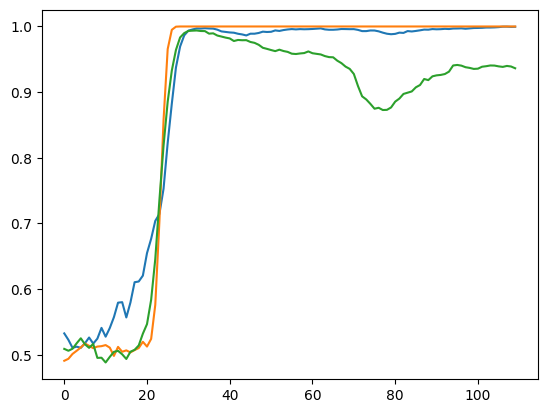

In [14]:
plt.plot(np.diag(np.mean(perf_lip_tr_s_t_s_neutral[:,:samp_limit,:samp_limit], axis=0)/20))
plt.plot(np.diag(np.mean(perf_pfc_tr_s_t_s_neutral[:,:samp_limit,:samp_limit], axis=0)/20))
plt.plot(np.diag(np.mean(perf_v4_tr_s_t_s_neutral[:,:samp_limit,:samp_limit], axis=0)/20))

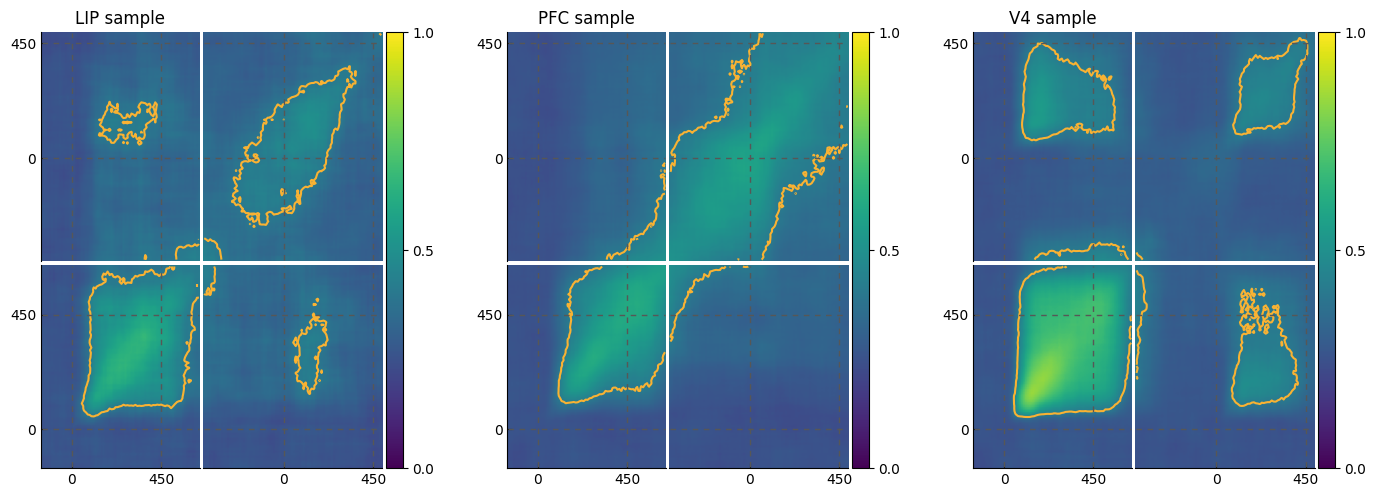

In [14]:

samp_limit  =   np.where(time_s==650)[0][0]
test_limit  =   np.where(time_t==500)[0][0]

xt_s=[np.where(time_s==0)[0][0], np.where(time_s==450)[0][0]]#, np.where(time_s==900)[0][0]]
xt_t=[np.where(time_t==0)[0][0], np.where(time_t==450)[0][0]]

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(18)

test_r=int(test_limit/10)
sample_r=int(samp_limit/10)

total_dim=(sample_r+test_r+1, (sample_r+test_r+1+5)*3)
panel_dim=sample_r+test_r+1+5
yloc=[0, panel_dim, panel_dim*2]

im00 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[0]), colspan=sample_r, rowspan=test_r)
im01 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[0]+sample_r), colspan=test_r, rowspan=test_r)
im10 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[0]), colspan=sample_r, rowspan=sample_r)
im11 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[0]+sample_r), colspan=test_r, rowspan=sample_r)
imcb0= plt.subplot2grid(shape=total_dim, loc=(0, yloc[0]+sample_r+test_r), colspan=1, rowspan=sample_r+test_r)

im02 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[1]), colspan=sample_r, rowspan=test_r)
im03 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[1]+sample_r), colspan=test_r, rowspan=test_r)
im12 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[1]), colspan=sample_r, rowspan=sample_r)
im13 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[1]+sample_r), colspan=test_r, rowspan=sample_r)
imcb1= plt.subplot2grid(shape=total_dim,  loc=(0, yloc[1]+sample_r+test_r), colspan=1, rowspan=sample_r+test_r)

im04 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[2]), colspan=sample_r, rowspan=test_r)
im05 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[2]+sample_r), colspan=test_r, rowspan=test_r)
im14 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[2]), colspan=sample_r, rowspan=sample_r)
im15 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[2]+sample_r), colspan=test_r, rowspan=sample_r)
imcb2= plt.subplot2grid(shape=total_dim,  loc=(0, yloc[2]+sample_r+test_r), colspan=1, rowspan=sample_r+test_r)

i00=im00.imshow(np.mean(perf_lip_tr_t_t_s_sample[:,:test_limit,:samp_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im10.imshow(np.mean(perf_lip_tr_s_t_s_sample[:,:samp_limit,:samp_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im01.imshow(np.mean(perf_lip_tr_t_t_t_sample[:,:test_limit,:test_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im11.imshow(np.mean(perf_lip_tr_s_t_t_sample[:,:samp_limit,:test_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')

im02.imshow(np.mean(perf_pfc_tr_t_t_s_sample[:,:test_limit,:samp_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im03.imshow(np.mean(perf_pfc_tr_t_t_t_sample[:,:test_limit,:test_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im12.imshow(np.mean(perf_pfc_tr_s_t_s_sample[:,:samp_limit,:samp_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im13.imshow(np.mean(perf_pfc_tr_s_t_t_sample[:,:samp_limit,:test_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')

im04.imshow(np.mean(perf_v4_tr_t_t_s_sample[:,:test_limit,:samp_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im05.imshow(np.mean(perf_v4_tr_t_t_t_sample[:,:test_limit,:test_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im14.imshow(np.mean(perf_v4_tr_s_t_s_sample[:,:samp_limit,:samp_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')
im15.imshow(np.mean(perf_v4_tr_s_t_t_sample[:,:samp_limit,:test_limit], axis=0)/40, vmin=0, vmax=1, origin='lower', aspect='auto')



im00.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_lip_tr_t_t_s_sample[:test_limit,:samp_limit], [thresh], colors='#F9B233')
im01.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_lip_tr_t_t_t_sample[:test_limit,:test_limit], [thresh], colors='#F9B233')
im10.contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_lip_tr_s_t_s_sample[:samp_limit,:samp_limit], [thresh], colors='#F9B233')
im11.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_lip_tr_s_t_t_sample[:samp_limit,:test_limit], [thresh], colors='#F9B233')

im02.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_pfc_tr_t_t_s_sample[:test_limit,:samp_limit], [thresh], colors='#F9B233')
im03.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_pfc_tr_t_t_t_sample[:test_limit,:test_limit], [thresh], colors='#F9B233')
im12.contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_pfc_tr_s_t_s_sample[:samp_limit,:samp_limit], [thresh], colors='#F9B233')
im13.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_pfc_tr_s_t_t_sample[:samp_limit,:test_limit], [thresh], colors='#F9B233')

im04.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_v4_tr_t_t_s_sample[:test_limit,:samp_limit], [thresh], colors='#F9B233')
im05.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_v4_tr_t_t_t_sample[:test_limit,:test_limit], [thresh], colors='#F9B233')
im14.contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_v4_tr_s_t_s_sample[:samp_limit,:samp_limit], [thresh], colors='#F9B233')
im15.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_v4_tr_s_t_t_sample[:samp_limit,:test_limit], [thresh], colors='#F9B233')

im00.set_xticks([])
im00.set_yticks(xt_t)
im01.set_xticks([])
im01.set_yticks([])
im10.set_xticks(xt_s)
im10.set_yticks(xt_s)
im11.set_xticks(xt_t)
im11.set_yticks([])

im00.plot([xt_s[0], xt_s[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im00.plot([xt_s[1], xt_s[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([xt_s[0], xt_s[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([xt_s[1], xt_s[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im00.plot([0, samp_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im00.plot([0, samp_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([0, samp_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([0, samp_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im01.plot([xt_t[0], xt_t[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im01.plot([xt_t[1], xt_t[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([xt_t[0], xt_t[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([xt_t[1], xt_t[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im01.plot([0, test_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im01.plot([0, test_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([0, test_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([0, test_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im02.plot([xt_s[0], xt_s[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im02.plot([xt_s[1], xt_s[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([xt_s[0], xt_s[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([xt_s[1], xt_s[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im02.plot([0, samp_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im02.plot([0, samp_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([0, samp_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([0, samp_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im03.plot([xt_t[0], xt_t[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im03.plot([xt_t[1], xt_t[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([xt_t[0], xt_t[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([xt_t[1], xt_t[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im03.plot([0, test_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im03.plot([0, test_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([0, test_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([0, test_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im04.plot([xt_s[0], xt_s[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im04.plot([xt_s[1], xt_s[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([xt_s[0], xt_s[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([xt_s[1], xt_s[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im04.plot([0, samp_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im04.plot([0, samp_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([0, samp_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([0, samp_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im05.plot([xt_t[0], xt_t[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im05.plot([xt_t[1], xt_t[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([xt_t[0], xt_t[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([xt_t[1], xt_t[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im05.plot([0, test_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im05.plot([0, test_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([0, test_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([0, test_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im00.set_yticklabels(time_t[xt_t].astype(str))
im10.set_xticklabels(time_s[xt_s].astype(str))
im10.set_yticklabels(time_s[xt_s].astype(str))
im11.set_xticklabels(time_t[xt_t].astype(str))

im00.set_yticklabels(time_t[xt_t].astype(str))
im10.set_xticklabels(time_s[xt_s].astype(str))
im10.set_yticklabels(time_s[xt_s].astype(str))
im11.set_xticklabels(time_t[xt_t].astype(str))

im02.set_xticks([])
im02.set_yticks(xt_t)
im03.set_xticks([])
im03.set_yticks([])
im12.set_xticks(xt_s)
im12.set_yticks(xt_s)
im13.set_xticks(xt_t)
im13.set_yticks([])

im02.set_yticklabels(time_t[xt_t].astype(str))
im12.set_xticklabels(time_s[xt_s].astype(str))
im12.set_yticklabels(time_s[xt_s].astype(str))
im13.set_xticklabels(time_t[xt_t].astype(str))


im04.set_xticks([])
im04.set_yticks(xt_t)
im05.set_xticks([])
im05.set_yticks([])
im14.set_xticks(xt_s)
im14.set_yticks(xt_s)
im15.set_xticks(xt_t)
im15.set_yticks([])

im04.set_yticklabels(time_t[xt_t].astype(str))
im14.set_xticklabels(time_s[xt_s].astype(str))
im14.set_yticklabels(time_s[xt_s].astype(str))
im15.set_xticklabels(time_t[xt_t].astype(str))



im00.spines['top'].set_visible(False)
im00.spines['right'].set_visible(False)
im00.spines['bottom'].set_visible(False)

im01.spines['top'].set_visible(False)
im01.spines['right'].set_visible(False)
im01.spines['bottom'].set_visible(False)
im01.spines['left'].set_visible(False)

im10.spines['top'].set_visible(False)
im10.spines['right'].set_visible(False)

im11.spines['top'].set_visible(False)
im11.spines['right'].set_visible(False)
im11.spines['left'].set_visible(False)

im02.spines['top'].set_visible(False)
im02.spines['right'].set_visible(False)
im02.spines['bottom'].set_visible(False)

im03.spines['top'].set_visible(False)
im03.spines['right'].set_visible(False)
im03.spines['bottom'].set_visible(False)
im03.spines['left'].set_visible(False)

im12.spines['top'].set_visible(False)
im12.spines['right'].set_visible(False)

im13.spines['top'].set_visible(False)
im13.spines['right'].set_visible(False)
im13.spines['left'].set_visible(False)


im04.spines['top'].set_visible(False)
im04.spines['right'].set_visible(False)
im04.spines['bottom'].set_visible(False)

im05.spines['top'].set_visible(False)
im05.spines['right'].set_visible(False)
im05.spines['bottom'].set_visible(False)
im05.spines['left'].set_visible(False)

im14.spines['top'].set_visible(False)
im14.spines['right'].set_visible(False)

im15.spines['top'].set_visible(False)
im15.spines['right'].set_visible(False)
im15.spines['left'].set_visible(False)

im00.tick_params(direction="in")
im01.tick_params(direction="in")
im10.tick_params(direction="in")
im11.tick_params(direction="in")

im02.tick_params(direction="in")
im03.tick_params(direction="in")
im12.tick_params(direction="in")
im13.tick_params(direction="in")

im04.tick_params(direction="in")
im05.tick_params(direction="in")
im14.tick_params(direction="in")
im15.tick_params(direction="in")

im00.set_title('LIP sample')
im02.set_title('PFC sample')
im04.set_title('V4 sample')
fig.colorbar(i00, cax=imcb0, ticks=[0, 0.5, 1])
fig.colorbar(i00, cax=imcb1, ticks=[0, 0.5, 1])
fig.colorbar(i00, cax=imcb2, ticks=[0, 0.5, 1])

# for ax in fig.get_axes():
#     ax.label_outer()
plt.savefig('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/figures/decoding_sample.pdf')

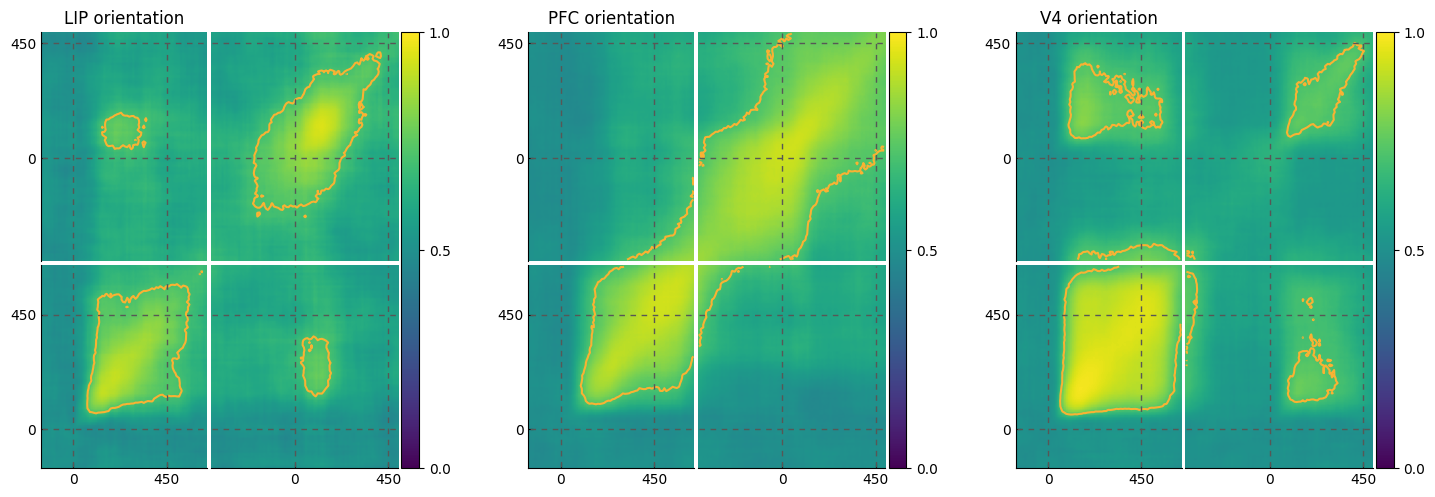

In [15]:

samp_limit  =   np.where(time_s==650)[0][0]
test_limit  =   np.where(time_t==500)[0][0]

xt_s=[np.where(time_s==0)[0][0], np.where(time_s==450)[0][0]]#, np.where(time_s==900)[0][0]]
xt_t=[np.where(time_t==0)[0][0], np.where(time_t==450)[0][0]]

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(18)

test_r=int(test_limit/10)
sample_r=int(samp_limit/10)

total_dim=(sample_r+test_r+1, (sample_r+test_r+5)*3)
panel_dim=sample_r+test_r+1+5
yloc=[0, panel_dim, panel_dim*2]

im00 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[0]), colspan=sample_r, rowspan=test_r)
im01 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[0]+sample_r), colspan=test_r, rowspan=test_r)
im10 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[0]), colspan=sample_r, rowspan=sample_r)
im11 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[0]+sample_r), colspan=test_r, rowspan=sample_r)
imcb0= plt.subplot2grid(shape=total_dim,  loc=(0, yloc[0]+sample_r+test_r), colspan=1, rowspan=sample_r+test_r)

im02 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[1]), colspan=sample_r, rowspan=test_r)
im03 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[1]+sample_r), colspan=test_r, rowspan=test_r)
im12 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[1]), colspan=sample_r, rowspan=sample_r)
im13 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[1]+sample_r), colspan=test_r, rowspan=sample_r)
imcb1= plt.subplot2grid(shape=total_dim,  loc=(0, yloc[1]+sample_r+test_r), colspan=1, rowspan=sample_r+test_r)

im04 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[2]), colspan=sample_r, rowspan=test_r)
im05 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[2]+sample_r), colspan=test_r, rowspan=test_r)
im14 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[2]), colspan=sample_r, rowspan=sample_r)
im15 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[2]+sample_r), colspan=test_r, rowspan=sample_r)
imcb2= plt.subplot2grid(shape=total_dim,  loc=(0, yloc[2]+sample_r+test_r), colspan=1, rowspan=sample_r+test_r)

i00=im00.imshow(np.mean(perf_lip_tr_t_t_s_orient[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im10.imshow(np.mean(perf_lip_tr_s_t_s_orient[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im01.imshow(np.mean(perf_lip_tr_t_t_t_orient[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im11.imshow(np.mean(perf_lip_tr_s_t_t_orient[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

im02.imshow(np.mean(perf_pfc_tr_t_t_s_orient[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im03.imshow(np.mean(perf_pfc_tr_t_t_t_orient[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im12.imshow(np.mean(perf_pfc_tr_s_t_s_orient[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im13.imshow(np.mean(perf_pfc_tr_s_t_t_orient[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

im04.imshow(np.mean(perf_v4_tr_t_t_s_orient[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im05.imshow(np.mean(perf_v4_tr_t_t_t_orient[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im14.imshow(np.mean(perf_v4_tr_s_t_s_orient[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im15.imshow(np.mean(perf_v4_tr_s_t_t_orient[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')



im00.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_lip_tr_t_t_s_orient[:test_limit,:samp_limit], [thresh], colors='#F9B233')
im01.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_lip_tr_t_t_t_orient[:test_limit,:test_limit], [thresh], colors='#F9B233')
im10.contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_lip_tr_s_t_s_orient[:samp_limit,:samp_limit], [thresh], colors='#F9B233')
im11.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_lip_tr_s_t_t_orient[:samp_limit,:test_limit], [thresh], colors='#F9B233')

im02.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_pfc_tr_t_t_s_orient[:test_limit,:samp_limit], [thresh], colors='#F9B233')
im03.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_pfc_tr_t_t_t_orient[:test_limit,:test_limit], [thresh], colors='#F9B233')
im12.contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_pfc_tr_s_t_s_orient[:samp_limit,:samp_limit], [thresh], colors='#F9B233')
im13.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_pfc_tr_s_t_t_orient[:samp_limit,:test_limit], [thresh], colors='#F9B233')

im04.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_v4_tr_t_t_s_orient[:test_limit,:samp_limit], [thresh], colors='#F9B233')
im05.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_v4_tr_t_t_t_orient[:test_limit,:test_limit], [thresh], colors='#F9B233')
im14.contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_v4_tr_s_t_s_orient[:samp_limit,:samp_limit], [thresh], colors='#F9B233')
im15.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_v4_tr_s_t_t_orient[:samp_limit,:test_limit], [thresh], colors='#F9B233')

im00.set_xticks([])
im00.set_yticks(xt_t)
im01.set_xticks([])
im01.set_yticks([])
im10.set_xticks(xt_s)
im10.set_yticks(xt_s)
im11.set_xticks(xt_t)
im11.set_yticks([])

im00.plot([xt_s[0], xt_s[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im00.plot([xt_s[1], xt_s[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([xt_s[0], xt_s[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([xt_s[1], xt_s[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im00.plot([0, samp_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im00.plot([0, samp_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([0, samp_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([0, samp_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im01.plot([xt_t[0], xt_t[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im01.plot([xt_t[1], xt_t[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([xt_t[0], xt_t[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([xt_t[1], xt_t[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im01.plot([0, test_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im01.plot([0, test_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([0, test_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([0, test_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im02.plot([xt_s[0], xt_s[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im02.plot([xt_s[1], xt_s[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([xt_s[0], xt_s[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([xt_s[1], xt_s[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im02.plot([0, samp_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im02.plot([0, samp_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([0, samp_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([0, samp_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im03.plot([xt_t[0], xt_t[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im03.plot([xt_t[1], xt_t[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([xt_t[0], xt_t[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([xt_t[1], xt_t[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im03.plot([0, test_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im03.plot([0, test_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([0, test_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([0, test_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im04.plot([xt_s[0], xt_s[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im04.plot([xt_s[1], xt_s[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([xt_s[0], xt_s[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([xt_s[1], xt_s[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im04.plot([0, samp_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im04.plot([0, samp_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([0, samp_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([0, samp_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im05.plot([xt_t[0], xt_t[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im05.plot([xt_t[1], xt_t[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([xt_t[0], xt_t[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([xt_t[1], xt_t[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im05.plot([0, test_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im05.plot([0, test_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([0, test_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([0, test_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im00.set_yticklabels(time_t[xt_t].astype(str))
im10.set_xticklabels(time_s[xt_s].astype(str))
im10.set_yticklabels(time_s[xt_s].astype(str))
im11.set_xticklabels(time_t[xt_t].astype(str))

im00.set_yticklabels(time_t[xt_t].astype(str))
im10.set_xticklabels(time_s[xt_s].astype(str))
im10.set_yticklabels(time_s[xt_s].astype(str))
im11.set_xticklabels(time_t[xt_t].astype(str))

im02.set_xticks([])
im02.set_yticks(xt_t)
im03.set_xticks([])
im03.set_yticks([])
im12.set_xticks(xt_s)
im12.set_yticks(xt_s)
im13.set_xticks(xt_t)
im13.set_yticks([])

im02.set_yticklabels(time_t[xt_t].astype(str))
im12.set_xticklabels(time_s[xt_s].astype(str))
im12.set_yticklabels(time_s[xt_s].astype(str))
im13.set_xticklabels(time_t[xt_t].astype(str))


im04.set_xticks([])
im04.set_yticks(xt_t)
im05.set_xticks([])
im05.set_yticks([])
im14.set_xticks(xt_s)
im14.set_yticks(xt_s)
im15.set_xticks(xt_t)
im15.set_yticks([])

im04.set_yticklabels(time_t[xt_t].astype(str))
im14.set_xticklabels(time_s[xt_s].astype(str))
im14.set_yticklabels(time_s[xt_s].astype(str))
im15.set_xticklabels(time_t[xt_t].astype(str))



im00.spines['top'].set_visible(False)
im00.spines['right'].set_visible(False)
im00.spines['bottom'].set_visible(False)

im01.spines['top'].set_visible(False)
im01.spines['right'].set_visible(False)
im01.spines['bottom'].set_visible(False)
im01.spines['left'].set_visible(False)

im10.spines['top'].set_visible(False)
im10.spines['right'].set_visible(False)

im11.spines['top'].set_visible(False)
im11.spines['right'].set_visible(False)
im11.spines['left'].set_visible(False)

im02.spines['top'].set_visible(False)
im02.spines['right'].set_visible(False)
im02.spines['bottom'].set_visible(False)

im03.spines['top'].set_visible(False)
im03.spines['right'].set_visible(False)
im03.spines['bottom'].set_visible(False)
im03.spines['left'].set_visible(False)

im12.spines['top'].set_visible(False)
im12.spines['right'].set_visible(False)

im13.spines['top'].set_visible(False)
im13.spines['right'].set_visible(False)
im13.spines['left'].set_visible(False)


im04.spines['top'].set_visible(False)
im04.spines['right'].set_visible(False)
im04.spines['bottom'].set_visible(False)

im05.spines['top'].set_visible(False)
im05.spines['right'].set_visible(False)
im05.spines['bottom'].set_visible(False)
im05.spines['left'].set_visible(False)

im14.spines['top'].set_visible(False)
im14.spines['right'].set_visible(False)

im15.spines['top'].set_visible(False)
im15.spines['right'].set_visible(False)
im15.spines['left'].set_visible(False)

im00.tick_params(direction="in")
im01.tick_params(direction="in")
im10.tick_params(direction="in")
im11.tick_params(direction="in")

im02.tick_params(direction="in")
im03.tick_params(direction="in")
im12.tick_params(direction="in")
im13.tick_params(direction="in")

im04.tick_params(direction="in")
im05.tick_params(direction="in")
im14.tick_params(direction="in")
im15.tick_params(direction="in")

im00.set_title('LIP orientation')
im02.set_title('PFC orientation')
im04.set_title('V4 orientation')
fig.colorbar(i00, cax=imcb0, ticks=[0, 0.5, 1])
fig.colorbar(i00, cax=imcb1, ticks=[0, 0.5, 1])
fig.colorbar(i00, cax=imcb2, ticks=[0, 0.5, 1])

# for ax in fig.get_axes():
#     ax.label_outer()
plt.savefig('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/figures/decoding_orientation.pdf') 

C:\Users\ibos.g\AppData\Local\Temp\ipykernel_19208\4027786053.py:53: UserWarning: No contour levels were found within the data range.
  im00.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_lip_tr_t_t_s_color[:test_limit,:samp_limit], [thresh], colors='#F9B233')
C:\Users\ibos.g\AppData\Local\Temp\ipykernel_19208\4027786053.py:54: UserWarning: No contour levels were found within the data range.
  im01.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_lip_tr_t_t_t_color[:test_limit,:test_limit], [thresh], colors='#F9B233')
C:\Users\ibos.g\AppData\Local\Temp\ipykernel_19208\4027786053.py:56: UserWarning: No contour levels were found within the data range.
  im11.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_lip_tr_s_t_t_color[:samp_limit,:test_limit], [thresh], colors='#F9B233')
C:\Users\ibos.g\AppData\Local\Temp\ipykernel_19208\4027786053.py

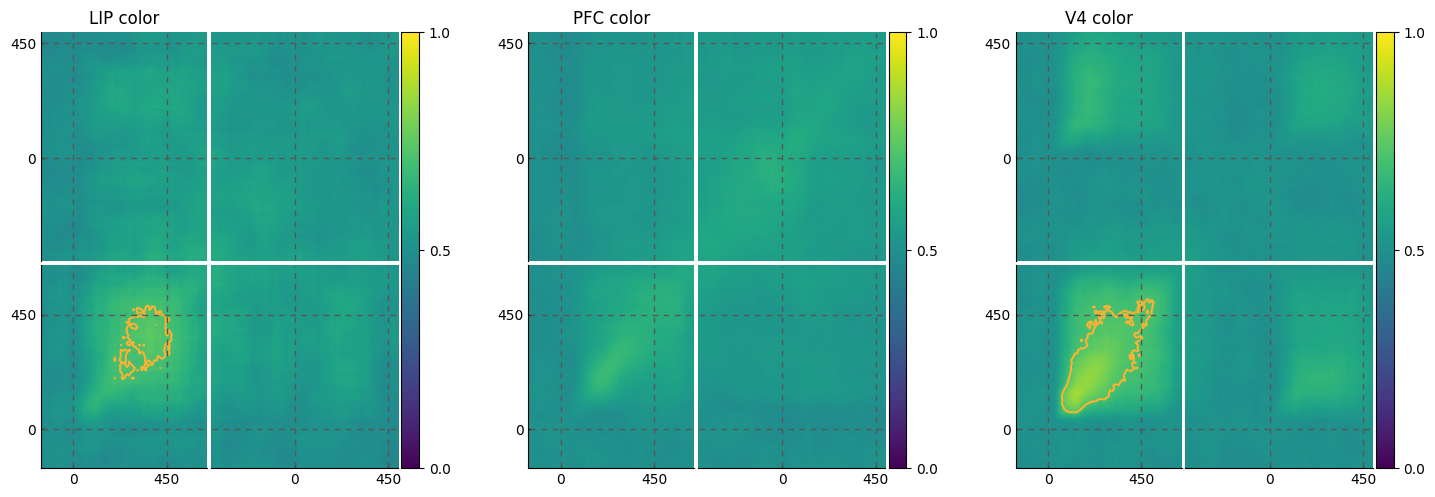

In [16]:

samp_limit  =   np.where(time_s==650)[0][0]
test_limit  =   np.where(time_t==500)[0][0]

xt_s=[np.where(time_s==0)[0][0], np.where(time_s==450)[0][0]]#, np.where(time_s==900)[0][0]]
xt_t=[np.where(time_t==0)[0][0], np.where(time_t==450)[0][0]]

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(18)

test_r=int(test_limit/10)
sample_r=int(samp_limit/10)

total_dim=(sample_r+test_r+1, (sample_r+test_r+5)*3)
panel_dim=sample_r+test_r+1+5
yloc=[0, panel_dim, panel_dim*2]

im00 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[0]), colspan=sample_r, rowspan=test_r)
im01 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[0]+sample_r), colspan=test_r, rowspan=test_r)
im10 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[0]), colspan=sample_r, rowspan=sample_r)
im11 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[0]+sample_r), colspan=test_r, rowspan=sample_r)
imcb0= plt.subplot2grid(shape=total_dim,  loc=(0, yloc[0]+sample_r+test_r), colspan=1, rowspan=sample_r+test_r)

im02 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[1]), colspan=sample_r, rowspan=test_r)
im03 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[1]+sample_r), colspan=test_r, rowspan=test_r)
im12 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[1]), colspan=sample_r, rowspan=sample_r)
im13 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[1]+sample_r), colspan=test_r, rowspan=sample_r)
imcb1= plt.subplot2grid(shape=total_dim,  loc=(0, yloc[1]+sample_r+test_r), colspan=1, rowspan=sample_r+test_r)

im04 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[2]), colspan=sample_r, rowspan=test_r)
im05 = plt.subplot2grid(shape=total_dim, loc=(0, yloc[2]+sample_r), colspan=test_r, rowspan=test_r)
im14 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[2]), colspan=sample_r, rowspan=sample_r)
im15 = plt.subplot2grid(shape=total_dim, loc=(test_r, yloc[2]+sample_r), colspan=test_r, rowspan=sample_r)
imcb2= plt.subplot2grid(shape=total_dim,  loc=(0, yloc[2]+sample_r+test_r), colspan=1, rowspan=sample_r+test_r)

i00=im00.imshow(np.mean(perf_lip_tr_t_t_s_color[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im10.imshow(np.mean(perf_lip_tr_s_t_s_color[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im01.imshow(np.mean(perf_lip_tr_t_t_t_color[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im11.imshow(np.mean(perf_lip_tr_s_t_t_color[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

im02.imshow(np.mean(perf_pfc_tr_t_t_s_color[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im03.imshow(np.mean(perf_pfc_tr_t_t_t_color[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im12.imshow(np.mean(perf_pfc_tr_s_t_s_color[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im13.imshow(np.mean(perf_pfc_tr_s_t_t_color[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')

im04.imshow(np.mean(perf_v4_tr_t_t_s_color[:,:test_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im05.imshow(np.mean(perf_v4_tr_t_t_t_color[:,:test_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im14.imshow(np.mean(perf_v4_tr_s_t_s_color[:,:samp_limit,:samp_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')
im15.imshow(np.mean(perf_v4_tr_s_t_t_color[:,:samp_limit,:test_limit], axis=0)/20, vmin=0, vmax=1, origin='lower', aspect='auto')



im00.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_lip_tr_t_t_s_color[:test_limit,:samp_limit], [thresh], colors='#F9B233')
im01.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_lip_tr_t_t_t_color[:test_limit,:test_limit], [thresh], colors='#F9B233')
im10.contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_lip_tr_s_t_s_color[:samp_limit,:samp_limit], [thresh], colors='#F9B233')
im11.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_lip_tr_s_t_t_color[:samp_limit,:test_limit], [thresh], colors='#F9B233')

im02.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_pfc_tr_t_t_s_color[:test_limit,:samp_limit], [thresh], colors='#F9B233')
im03.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_pfc_tr_t_t_t_color[:test_limit,:test_limit], [thresh], colors='#F9B233')
im12.contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_pfc_tr_s_t_s_color[:samp_limit,:samp_limit], [thresh], colors='#F9B233')
im13.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_pfc_tr_s_t_t_color[:samp_limit,:test_limit], [thresh], colors='#F9B233')

im04.contour(X_grid_tr_t_t_s[:test_limit, :samp_limit], Y_grid_tr_t_t_s[:test_limit, :samp_limit], sig_v4_tr_t_t_s_color[:test_limit,:samp_limit], [thresh], colors='#F9B233')
im05.contour(X_grid_tr_t_t_t[:test_limit, :test_limit], Y_grid_tr_t_t_t[:test_limit, :test_limit], sig_v4_tr_t_t_t_color[:test_limit,:test_limit], [thresh], colors='#F9B233')
im14.contour(X_grid_tr_s_t_s[:samp_limit, :samp_limit], Y_grid_tr_s_t_s[:samp_limit, :samp_limit], sig_v4_tr_s_t_s_color[:samp_limit,:samp_limit], [thresh], colors='#F9B233')
im15.contour(X_grid_tr_s_t_t[:samp_limit, :test_limit], Y_grid_tr_s_t_t[:samp_limit, :test_limit], sig_v4_tr_s_t_t_color[:samp_limit,:test_limit], [thresh], colors='#F9B233')

im00.set_xticks([])
im00.set_yticks(xt_t)
im01.set_xticks([])
im01.set_yticks([])
im10.set_xticks(xt_s)
im10.set_yticks(xt_s)
im11.set_xticks(xt_t)
im11.set_yticks([])

im00.plot([xt_s[0], xt_s[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im00.plot([xt_s[1], xt_s[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([xt_s[0], xt_s[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([xt_s[1], xt_s[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im00.plot([0, samp_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im00.plot([0, samp_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([0, samp_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im10.plot([0, samp_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im01.plot([xt_t[0], xt_t[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im01.plot([xt_t[1], xt_t[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([xt_t[0], xt_t[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([xt_t[1], xt_t[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im01.plot([0, test_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im01.plot([0, test_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([0, test_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im11.plot([0, test_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im02.plot([xt_s[0], xt_s[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im02.plot([xt_s[1], xt_s[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([xt_s[0], xt_s[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([xt_s[1], xt_s[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im02.plot([0, samp_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im02.plot([0, samp_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([0, samp_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im12.plot([0, samp_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im03.plot([xt_t[0], xt_t[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im03.plot([xt_t[1], xt_t[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([xt_t[0], xt_t[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([xt_t[1], xt_t[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im03.plot([0, test_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im03.plot([0, test_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([0, test_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im13.plot([0, test_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im04.plot([xt_s[0], xt_s[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im04.plot([xt_s[1], xt_s[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([xt_s[0], xt_s[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([xt_s[1], xt_s[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im04.plot([0, samp_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im04.plot([0, samp_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([0, samp_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im14.plot([0, samp_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im05.plot([xt_t[0], xt_t[0]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im05.plot([xt_t[1], xt_t[1]], [0, test_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([xt_t[0], xt_t[0]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([xt_t[1], xt_t[1]], [0, samp_limit-1], color='#575756', dashes=[4, 4],linewidth=1)

im05.plot([0, test_limit-1], [xt_t[0], xt_t[0]], color='#575756', dashes=[4, 4],linewidth=1)
im05.plot([0, test_limit-1], [xt_t[1], xt_t[1]], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([0, test_limit-1], [xt_s[0], xt_s[0]], color='#575756', dashes=[4, 4],linewidth=1)
im15.plot([0, test_limit-1], [xt_s[1], xt_s[1]], color='#575756', dashes=[4, 4],linewidth=1)

im00.set_yticklabels(time_t[xt_t].astype(str))
im10.set_xticklabels(time_s[xt_s].astype(str))
im10.set_yticklabels(time_s[xt_s].astype(str))
im11.set_xticklabels(time_t[xt_t].astype(str))

im00.set_yticklabels(time_t[xt_t].astype(str))
im10.set_xticklabels(time_s[xt_s].astype(str))
im10.set_yticklabels(time_s[xt_s].astype(str))
im11.set_xticklabels(time_t[xt_t].astype(str))

im02.set_xticks([])
im02.set_yticks(xt_t)
im03.set_xticks([])
im03.set_yticks([])
im12.set_xticks(xt_s)
im12.set_yticks(xt_s)
im13.set_xticks(xt_t)
im13.set_yticks([])

im02.set_yticklabels(time_t[xt_t].astype(str))
im12.set_xticklabels(time_s[xt_s].astype(str))
im12.set_yticklabels(time_s[xt_s].astype(str))
im13.set_xticklabels(time_t[xt_t].astype(str))


im04.set_xticks([])
im04.set_yticks(xt_t)
im05.set_xticks([])
im05.set_yticks([])
im14.set_xticks(xt_s)
im14.set_yticks(xt_s)
im15.set_xticks(xt_t)
im15.set_yticks([])

im04.set_yticklabels(time_t[xt_t].astype(str))
im14.set_xticklabels(time_s[xt_s].astype(str))
im14.set_yticklabels(time_s[xt_s].astype(str))
im15.set_xticklabels(time_t[xt_t].astype(str))



im00.spines['top'].set_visible(False)
im00.spines['right'].set_visible(False)
im00.spines['bottom'].set_visible(False)

im01.spines['top'].set_visible(False)
im01.spines['right'].set_visible(False)
im01.spines['bottom'].set_visible(False)
im01.spines['left'].set_visible(False)

im10.spines['top'].set_visible(False)
im10.spines['right'].set_visible(False)

im11.spines['top'].set_visible(False)
im11.spines['right'].set_visible(False)
im11.spines['left'].set_visible(False)

im02.spines['top'].set_visible(False)
im02.spines['right'].set_visible(False)
im02.spines['bottom'].set_visible(False)

im03.spines['top'].set_visible(False)
im03.spines['right'].set_visible(False)
im03.spines['bottom'].set_visible(False)
im03.spines['left'].set_visible(False)

im12.spines['top'].set_visible(False)
im12.spines['right'].set_visible(False)

im13.spines['top'].set_visible(False)
im13.spines['right'].set_visible(False)
im13.spines['left'].set_visible(False)


im04.spines['top'].set_visible(False)
im04.spines['right'].set_visible(False)
im04.spines['bottom'].set_visible(False)

im05.spines['top'].set_visible(False)
im05.spines['right'].set_visible(False)
im05.spines['bottom'].set_visible(False)
im05.spines['left'].set_visible(False)

im14.spines['top'].set_visible(False)
im14.spines['right'].set_visible(False)

im15.spines['top'].set_visible(False)
im15.spines['right'].set_visible(False)
im15.spines['left'].set_visible(False)

im00.tick_params(direction="in")
im01.tick_params(direction="in")
im10.tick_params(direction="in")
im11.tick_params(direction="in")

im02.tick_params(direction="in")
im03.tick_params(direction="in")
im12.tick_params(direction="in")
im13.tick_params(direction="in")

im04.tick_params(direction="in")
im05.tick_params(direction="in")
im14.tick_params(direction="in")
im15.tick_params(direction="in")

im00.set_title('LIP color')
im02.set_title('PFC color')
im04.set_title('V4 color')
fig.colorbar(i00, cax=imcb0, ticks=[0, 0.5, 1])
fig.colorbar(i00, cax=imcb1, ticks=[0, 0.5, 1])
fig.colorbar(i00, cax=imcb2, ticks=[0, 0.5, 1])

# for ax in fig.get_axes():
#     ax.label_outer()
plt.savefig('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/figures/decoding_color.pdf') 